<a href="https://colab.research.google.com/github/Lzhenghong/Mini-ML-Projects/blob/main/NLP/Skimlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
# Read lines of a document
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + 'train.txt')
train_lines

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
# Structure text into desired dictionary format
# Extract target label, text, number of sentences, sentence number
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ''
  abstract_samples = []

  for line in input_lines:
    if line.startswith('###'):
      abstract_id = line
      # Reset abstract string if line is ID line
      abstract_lines = ''
    elif line.isspace():
      # Split abstract lines into separate lines
      abstract_line_split = abstract_lines.splitlines()
      # Iterate each line in single abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        # 0-index
        line_data['total_lines'] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples

In [ ]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + 'train.txt')
val_samples = preprocess_text_with_line_numbers(data_dir + 'dev.txt')
test_samples = preprocess_text_with_line_numbers(data_dir + 'test.txt')
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 694 ms, sys: 95.2 ms, total: 789 ms
Wall time: 1.18 s


In [ ]:
train_samples[:12]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [ ]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape((-1,1)))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape((-1,1)))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape((-1,1)))


In [ ]:
import tensorflow as tf

tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy())
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
# baseline model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model0 = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model0.fit(train_sentences, train_labels_encoded)

model0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-15 15:41:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-15 15:41:46 (80.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(val_labels_encoded, baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

In [ ]:
import numpy as np
from tensorflow.keras import layers

sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

In [ ]:
# 95th percentile for sentence length
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
max_tokens = 68000

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length=output_seq_len)

text_vectorizer.adapt(train_sentences)

In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                               output_dim=128,
                               mask_zero=True) # handle variable sequence length to save space

In [ ]:
# Turn data into tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# conv1D model
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model1 = tf.keras.Model(inputs, outputs)
model1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history1 = model1.fit(train_dataset,
                      steps_per_epoch=int(0.1*len(train_dataset)),
                      epochs=3,
                      validation_data=val_dataset,
                      validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 17s 9ms/step - loss: 0.9304 - accuracy: 0.6310 - val_loss: 0.6908 - val_accuracy: 0.7374
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6572 - accuracy: 0.7573 - val_loss: 0.6329 - val_accuracy: 0.7676
Epoch 3/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6187 - accuracy: 0.7745 - val_loss: 0.5996 - val_accuracy: 0.7803


In [ ]:
model1_pred_probs = model1.predict(val_dataset)
model1_preds = tf.argmax(model1_pred_probs, axis=1)
model1_results = calculate_results(val_labels_encoded,
                                   model1_preds)
model1_results

{'accuracy': 78.3595922150139,
 'f1': 0.780657805569245,
 'precision': 0.7800585868472059,
 'recall': 0.7835959221501391}

In [ ]:
model1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
import tensorflow_hub as hub

tf_hub_embedding_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                 trainable=False)

In [ ]:
# Pretrained embeddings from tensorflow hub
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation='relu')(pretrained_embedding)
outputs = layers.Dense(5, activation='softmax')(x)
model2 = tf.keras.Model(inputs, outputs)

model2 = tf.keras.Model(inputs, outputs)
model2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history2 = model2.fit(train_dataset,
                      steps_per_epoch=int(0.1*len(train_dataset)),
                      epochs=3,
                      validation_data=val_dataset,
                      validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 11s 14ms/step - loss: 0.9135 - accuracy: 0.6473 - val_loss: 0.7975 - val_accuracy: 0.6878
Epoch 2/3
562/562 [==============================] - 9s 15ms/step - loss: 0.7690 - accuracy: 0.7005 - val_loss: 0.7553 - val_accuracy: 0.7051
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7529 - accuracy: 0.7110 - val_loss: 0.7414 - val_accuracy: 0.7124


In [ ]:
model2_pred_probs = model2.predict(val_dataset)
model2_preds = tf.argmax(model2_pred_probs, axis=1)
model2_results = calculate_results(val_labels_encoded,
                                   model2_preds)
model2_results

{'accuracy': 71.23990467363961,
 'f1': 0.709355964885453,
 'precision': 0.7135602494463436,
 'recall': 0.7123990467363961}

In [ ]:
# Split sentences into characters
def split_chars(text):
  return ' '.join(list(text))

In [ ]:
# Split sequence level data into character level data
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
# Get all keyboard characters
import string

alphabets = string.ascii_lowercase + string.digits + string.punctuation
alphabets

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# char-level token vectorizer
num_char_tokens = len(alphabets) + 2 # space and OOV
char_vectorizer = TextVectorization(max_tokens=num_char_tokens,
                                    output_sequence_length=output_seq_char_len)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
# Char embedding layer
char_vocab = char_vectorizer.get_vocabulary()
char_embed = layers.Embedding(input_dim=len(char_vocab),
                              output_dim=25,
                              mask_zero=True)

In [ ]:
# Conv1D model using char embedding
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(char_embeddings)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model3 = tf.keras.Model(inputs, outputs)

model3.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
# char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history3 = model3.fit(train_char_dataset,
                      steps_per_epoch=int(0.1*len(train_char_dataset)),
                      epochs=3,
                      validation_data=val_char_dataset,
                      validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2570 - accuracy: 0.4840 - val_loss: 1.1131 - val_accuracy: 0.5419
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0812 - accuracy: 0.5581 - val_loss: 1.0117 - val_accuracy: 0.5848
Epoch 3/3
562/562 [==============================] - 3s 6ms/step - loss: 1.0172 - accuracy: 0.5874 - val_loss: 0.9680 - val_accuracy: 0.6217


In [ ]:
model3_pred_probs = model3.predict(val_char_dataset)
model3_preds = tf.argmax(model3_pred_probs, axis=1)
model3_results = calculate_results(val_labels_encoded,
                                   model3_preds)
model3_results

{'accuracy': 60.618297365285315,
 'f1': 0.5957145987615368,
 'precision': 0.6249139134978016,
 'recall': 0.6061829736528531}

In [ ]:
# Combining token and character embeddings
token_inputs = layers.Input(shape=[], dtype=tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_output)

char_inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# hybrid embedding
token_char_concat = layers.Concatenate()([token_model.output,
                                          char_model.output])

# add Dropout to output layer
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(5, activation='softmax')(final_dropout)

model4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                        outputs=output_layer)

model4.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
# Plot hybrid token and character model
from keras.utils import plot_model
plot_model(model4, show_shapes=True)

In [ ]:
# combine token and character data into a dataset
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data, train_token_char_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_data, val_token_char_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_token_char_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_data, test_token_char_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history4 = model4.fit(train_token_char_dataset,
                      steps_per_epoch=int(0.1*len(train_token_char_dataset)),
                      epochs=3,
                      validation_data=val_token_char_dataset,
                      validation_steps=int(0.1*len(val_token_char_dataset)))

Epoch 1/3
562/562 [==============================] - 38s 53ms/step - loss: 0.9839 - accuracy: 0.6015 - val_loss: 0.7750 - val_accuracy: 0.7031
Epoch 2/3
562/562 [==============================] - 27s 48ms/step - loss: 0.8004 - accuracy: 0.6913 - val_loss: 0.7175 - val_accuracy: 0.7304
Epoch 3/3
562/562 [==============================] - 25s 44ms/step - loss: 0.7777 - accuracy: 0.7053 - val_loss: 0.6942 - val_accuracy: 0.7347


In [ ]:
model4_pred_probs = model4.predict(val_token_char_dataset)
model4_preds = tf.argmax(model4_pred_probs, axis=1)
model4_results = calculate_results(val_labels_encoded,
                                   model4_preds)
model4_results

{'accuracy': 73.3119290348206,
 'f1': 0.7308580657709169,
 'precision': 0.7321182500022656,
 'recall': 0.733119290348206}

In [ ]:
# one hot encode line number
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth=15)

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(), depth=20)

In [ ]:
# tribrid embedding model
token_inputs = layers.Input(shape=[], dtype=tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_output)

char_inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

line_number_inputs = layers.Input(shape=(15,), dtype=tf.float32)
x = layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, x)

total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32)
y = layers.Dense(32, activation='relu')(total_lines_inputs)
total_line_model = tf.keras.Model(total_lines_inputs, y)

hybrid_embeddings = layers.Concatenate()([token_model.output,
                                          char_model.output])

z = layers.Dense(256, activation='relu')(hybrid_embeddings)
z = layers.Dropout(0.5)(z)

tribrid_embeddings = layers.Concatenate()([line_number_model.output,
                                           total_line_model.output,
                                           z])

output_layer = layers.Dense(5, activation='softmax')(tribrid_embeddings)
model5 = tf.keras.Model(inputs=[line_number_model.input,
                                total_line_model.input,
                                token_model.input,
                                char_model.input],
                        outputs=output_layer)

model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer='Adam',
               metrics=['accuracy'])

In [ ]:
# combine all 4 inputs into dataset
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                                val_total_lines_one_hot,
                                                                val_sentences,
                                                                val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                                test_total_lines_one_hot,
                                                                test_sentences,
                                                                test_chars))
test_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data, test_char_token_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history5 = model5.fit(train_char_token_pos_dataset,
                      steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                      epochs=3,
                      validation_data=val_char_token_pos_dataset,
                      validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 38s 54ms/step - loss: 1.0967 - accuracy: 0.7258 - val_loss: 0.9837 - val_accuracy: 0.8078
Epoch 2/3
562/562 [==============================] - 27s 49ms/step - loss: 0.9693 - accuracy: 0.8152 - val_loss: 0.9505 - val_accuracy: 0.8275
Epoch 3/3
562/562 [==============================] - 25s 44ms/step - loss: 0.9514 - accuracy: 0.8226 - val_loss: 0.9403 - val_accuracy: 0.8301


In [ ]:
model5_pred_probs = model5.predict(val_char_token_pos_dataset)
model5_preds = tf.argmax(model5_pred_probs, axis=1)
model5_results = calculate_results(val_labels_encoded,
                                   model5_preds)
model5_results

{'accuracy': 83.23513835562028,
 'f1': 0.8313136706451352,
 'precision': 0.831330106644271,
 'recall': 0.8323513835562029}

In [ ]:
# Compare model reuslts
all_results_pd = pd.DataFrame({'model0: baseline': baseline_results,
                               'model1: token embedding': model1_results,
                               'model2: pretrained token embedding': model2_results,
                               'model3: character embedding': model3_results,
                               'model4: hybrid embedding': model4_results,
                               'model5: tribrid embedding': model5_results})
all_results_pd = all_results_pd.transpose()
all_results_pd

,accuracy,precision,recall,f1
model0: baseline,72.183238,0.718647,0.721832,0.698925
model1: token embedding,78.359592,0.780059,0.783596,0.780658
model2: pretrained token embedding,71.239905,0.713560,0.712399,0.709356
model3: character embedding,60.618297,0.624914,0.606183,0.595715
model4: hybrid embedding,73.311929,0.732118,0.733119,0.730858
model5: tribrid embedding,83.235138,0.831330,0.832351,0.831314


In [ ]:
all_results_pd['accuracy'] = all_results_pd['accuracy']/100

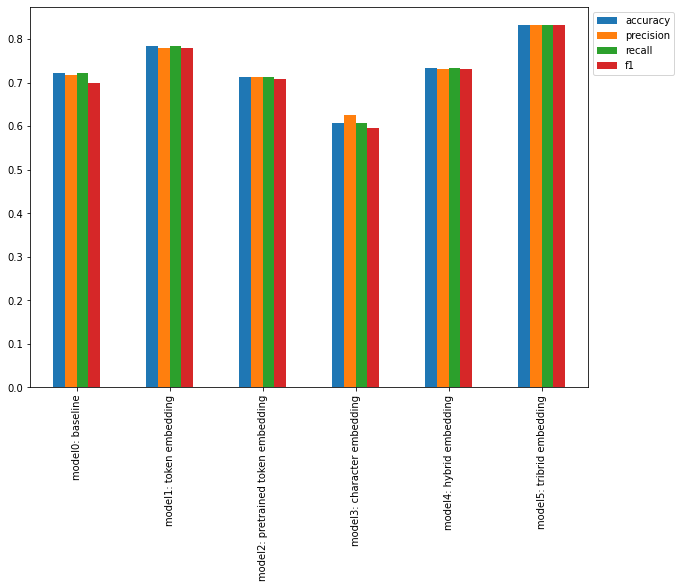

In [ ]:
all_results_pd.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))